## データを確認する

In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv("../csv/train.csv")
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test = pd.read_csv("../csv/test.csv")
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### データの数を確認

In [4]:
print("Train データ数", len(train))
print("Test データ数", len(test))

Train データ数 159571
Test データ数 153164


### 比率確認

In [5]:
sum = len(train) + len(test)
print("train全体に占める比率: ", round(len(train)*100/sum))
print("test全体に占める比率: ", round(len(test)*100/sum))

train全体に占める比率:  51
test全体に占める比率:  49


### commentのみを抜き出し

In [6]:
x_train = train["comment_text"]
x_train.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

### その他はyに入れる

In [7]:
# y_train = train[:,2:]
# y_train.head()

### 欠損値確認

In [8]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [9]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

今回欠損値はないみたい

In [11]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

### クラスの不均衡を調べる

In [15]:
# 行データすべて、列データは2列目以降取得
train.iloc[:, 2:].head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [55]:
x =train.iloc[:, 2:].sum()
rowsums = train.iloc[:, 2:].sum(axis=1)
train["clean"] = (rowsums==0)
# clean comment の総数
train['clean'].sum()

0

Text(0.5,0,'Type')

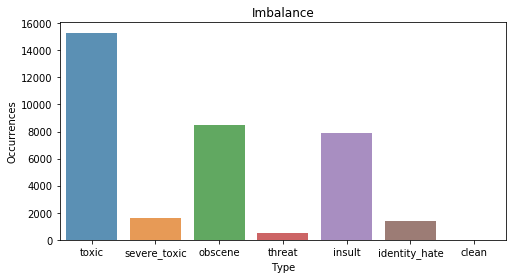

In [56]:
# 可視化
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns

x = train.iloc[:, 2:].sum()
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Imbalance")
plt.ylabel("Occurrences")
plt.xlabel("Type")

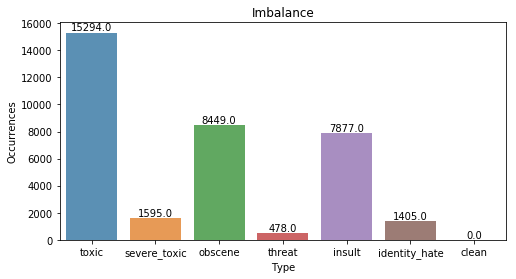

In [57]:
# 上記のグラフにデータ数を追加する
x = train.iloc[:, 2:].sum()
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Imbalance")
plt.ylabel("Occurrences")
plt.xlabel("Type")

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

### 上記グラフからわかること

- `toxicity`は全体的にデータとして散らばっていない
    - クラス不均衡になっている
- データ数がもとの数より多い
    - 複数にまたがってタグが存在している

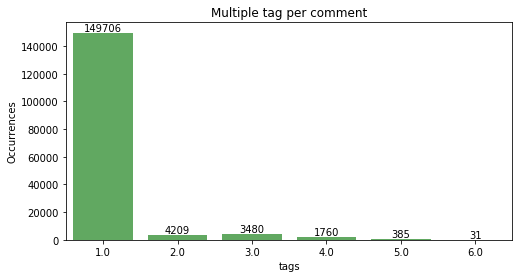

In [64]:
x = rowsums.value_counts()
color = sns.color_palette()

plt.figure(figsize=(8, 4))
ax = sns.barplot(x.index, x.values, alpha=0.8, color=color[2])
plt.title("Multiple tag per comment")
plt.ylabel("Occurrences")
plt.xlabel("tags")

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 上記グラフからわかること
想定していたとおり、複数にまたがって存在しているタグがある